<h1><center>MACHINE LEARNING PROJECT</center></h1>
<h2><center>Title - Pneumonia Diagnosis Using Chest Cavity X-ray images</center></h2>
<h3><center>Team Members - Priyansh Bhatnagar(2K18/EP/058)</center></h3>

### Importing Libraries

In [1]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
print(os.listdir("chest_xray\chest_xray"))

['.DS_Store', 'test', 'train', 'val']


In [3]:
print(os.listdir("chest_xray/train/"))

['NORMAL', 'PNEUMONIA']


In [4]:
TRAIN_set = "chest_xray/train/"
TEST_set =  "chest_xray/test/"

In [5]:
img1 = cv2.imread('chest_xray/train/NORMAL/IM-0115-0001.jpeg')
img2 = cv2.imread('chest_xray/train/NORMAL/IM-0117-0001.jpeg')

#cv2.imshow('img',img)
#cv2.waitKey(0) 
#cv2.destroyAllWindows() 

In [6]:
img1.shape, img2.shape
# Hence all images have different shapes

((1858, 2090, 3), (1152, 1422, 3))

In [7]:
def preprocessing(Dir):
    x = []
    Y = []
    for next_dir in os.listdir(Dir):
        # First Step of Preprocessing - Labelling of data
        if not next_dir.startswith('.'):
            if next_dir in ['NORMAL']:
                label = 0
            elif next_dir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp_dir = Dir + next_dir
                
            for f in tqdm(os.listdir(temp_dir)):
                # Next step of preprocessing - Resizing the image to (64,64,3)
                img = cv2.imread(temp_dir + '/' + f)
                if img is not None:
                    img = cv2.resize(img, (64, 64))
                    img = np.asarray(img)
                    x.append(img)
                    Y.append(label)
                    
    x = np.asarray(x)
    Y = np.asarray(Y)
    return x,Y

In [8]:
TRAIN_set
train_x,train_y = preprocessing(TRAIN_set)

100%|██████████████████████████████████████████████████████████████████████████████| 3875/3875 [01:13<00:00, 52.41it/s]


In [9]:
test_x ,test_y = preprocessing(TEST_set)

100%|████████████████████████████████████████████████████████████████████████████████| 390/390 [00:07<00:00, 53.27it/s]


In [10]:
print(train_x.shape,'\n',test_x.shape)

(5216, 64, 64, 3) 
 (624, 64, 64, 3)


In [11]:
print(train_y.shape,'\n',test_y.shape)
test_y

(5216,) 
 (624,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
Pimg = os.listdir(TRAIN_set + "PNEUMONIA")
Nimg = os.listdir(TRAIN_set + "NORMAL")

(Left) - No Pneumonia Vs (Right) - Pneumonia
---------------------------------------------


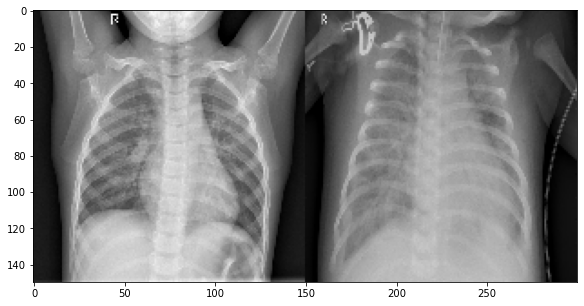

(Left) - No Pneumonia Vs (Right) - Pneumonia
---------------------------------------------


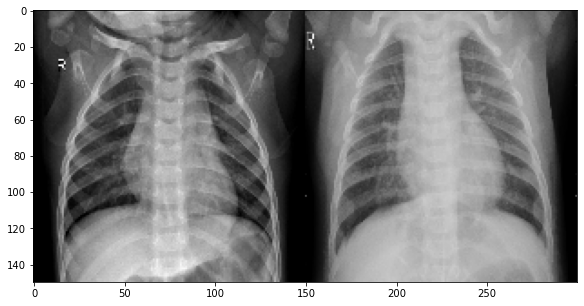

(Left) - No Pneumonia Vs (Right) - Pneumonia
---------------------------------------------


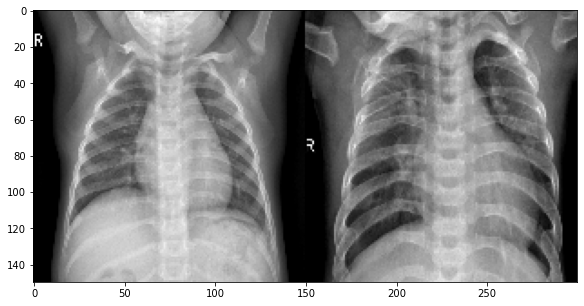

In [13]:

def plot(i):
    
    imgp1 = cv2.imread(TRAIN_set+"PNEUMONIA/"+Pimg[i])
    imgp1 = cv2.resize(imgp1, (150, 150))
    imgn1 = cv2.imread(TRAIN_set+"NORMAL/"+Nimg[i])
    imgn1 = cv2.resize(imgn1, (150, 150))
    pair = np.concatenate((imgn1, imgp1), axis=1)
    print("(Left) - No Pneumonia Vs (Right) - Pneumonia")
    print("---------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,3):
    plot(i)

In [14]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=1, verbose=1)

In [23]:
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [17]:
filepath="weights.hdf5"
filepath

'weights.hdf5'

In [18]:
from keras.models import Sequential
from keras.layers import MaxPooling2D
#from sklearn.model_selection import GridSearchCV
from keras.layers import Dense , Activation
from keras.layers import Flatten
#from keras.utils import np_utils
#from keras.constraints import maxnorm
from keras.layers import Conv2D # , BatchNormalization
#from keras.optimizers import SGD , RMSprop
from keras.wrappers.scikit_learn import KerasClassifier

In [20]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D((2,2)))

classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D((2,2)))

classifier.add(Flatten())

classifier.add(Dense(units=128,activation ='relu'))
classifier.add(Dense(units=128,activation ='relu'))
classifier.add(Dense(units=1, activation ='sigmoid'))

classifier.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

print(classifier.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
classifier2 = Sequential()
classifier2.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier2.add(MaxPooling2D((2,2)))

In [21]:
batch_size = 256
epochs = 6

In [24]:
history = classifier.fit(train_x,train_y, validation_data = (test_x , test_y) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)

Epoch 1/6
163/163 [==============================] - 12s 72ms/step - loss: 3.0342 - accuracy: 0.8750 - val_loss: 0.8808 - val_accuracy: 0.7083
Epoch 2/6
163/163 [==============================] - 12s 72ms/step - loss: 0.1093 - accuracy: 0.9563 - val_loss: 1.1510 - val_accuracy: 0.7067
Epoch 3/6
163/163 [==============================] - 13s 78ms/step - loss: 0.0920 - accuracy: 0.9670 - val_loss: 0.6810 - val_accuracy: 0.7724
Epoch 4/6
163/163 [==============================] - 12s 76ms/step - loss: 0.1165 - accuracy: 0.9563 - val_loss: 1.1002 - val_accuracy: 0.7612
Epoch 5/6
163/163 [==============================] - 12s 71ms/step - loss: 0.0622 - accuracy: 0.9780 - val_loss: 1.4175 - val_accuracy: 0.7276
Epoch 6/6
163/163 [==============================] - 11s 70ms/step - loss: 0.0537 - accuracy: 0.9797 - val_loss: 1.8614 - val_accuracy: 0.7340


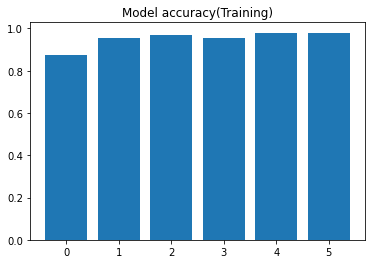

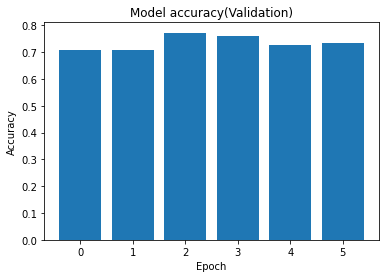

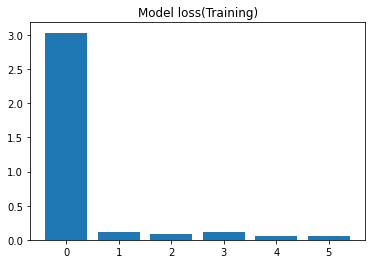

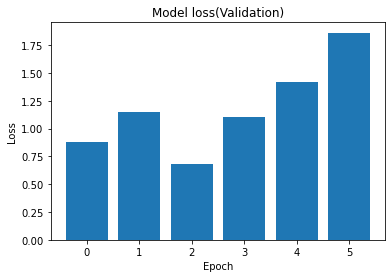

In [36]:
import matplotlib.pyplot as plt
epochs_ = [0, 1, 2 ,3 ,4 , 5 ]
plt.bar(epochs_,history.history['accuracy'])
plt.title('Model accuracy(Training)')
plt.figure()
plt.bar(epochs_,history.history['val_accuracy'])
plt.title('Model accuracy(Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')


plt.show()
# summarize history for loss
plt.bar(epochs_,history.history['loss'])
plt.title('Model loss(Training)')
plt.figure()

plt.bar(epochs_,history.history['val_loss'])
plt.title('Model loss(Validation)')
plt.ylabel('Loss')
plt.xlabel('Epoch')

#plt.figure()
plt.show()


In [53]:
from sklearn.metrics import confusion_matrix
pred = classifier.predict(X_test)
pred

array([[6.16062284e-01],
       [9.99981523e-01],
       [9.99953628e-01],
       [9.98970568e-01],
       [2.92652547e-02],
       [6.54408038e-01],
       [1.66091323e-03],
       [2.53381431e-02],
       [9.98902798e-01],
       [5.41218877e-01],
       [1.13372014e-04],
       [1.00000000e+00],
       [9.61454034e-01],
       [4.25053418e-01],
       [9.99967992e-01],
       [1.00000000e+00],
       [9.99677062e-01],
       [2.02655792e-04],
       [5.48846126e-02],
       [6.54690504e-01],
       [9.82690275e-01],
       [1.00000000e+00],
       [6.01291597e-01],
       [6.74417734e-01],
       [9.99999642e-01],
       [8.47330809e-01],
       [1.00000000e+00],
       [7.75170684e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99979377e-01],
       [1.00000000e+00],
       [9.99995649e-01],
       [8.92060697e-02],
       [9.99999523e-01],
       [7.97749877e-01],
       [1.55538321e-04],
       [4.30712104e-03],
       [5.23877740e-02],
       [1.28695160e-01],


In [54]:
pred_ = []
for i in range(624): 
 pred_.insert(i,1 if pred[i] >= 9e-01 else 0)


In [55]:
#pred_ =pred_.resize(624,)
predn = np.array(pred_)
predn.reshape(624,)
(predn==y_test).sum()


495

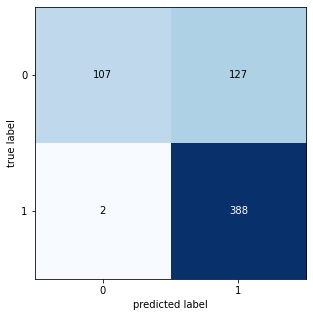

In [56]:
CM = confusion_matrix(y_test, pred_)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [57]:
metrics.f1_score(y_test,predn)

0.8574585635359117

In [58]:
metrics.precision_score(y_test,predn)

0.7533980582524272

In [59]:
metrics.recall_score(y_test,predn)

0.9948717948717949

#### Here , Recall is most significant quantity even more than accuracy and precision.

Since we are having unequal number of people in both the classes , therefore we can't take accuracy as an alone metric to calculate model efficieny .

#### Precision = True Positive / (True Positive + False Positive)
#### Recall = True Positive / (True Positive +  False Negative)

Also precision can't be taken as alone metric and has less significance than recall in this particular dataset because we have to minimize false negative and that is in the denominator and thus finally increasing 'Recall' .
False negative has to be intuitively minimized because falsely diagnosing a patient of pneumonia as not having a pneumonia is a much larger deal than falsely diagnosing a healthy person as a pneumonia patient which is our major concern . That is why we are making this model . To reduce the mistakes done by doctors accidentally .¶